# Prediksi Subscibe oleh Klien Berdasarkan Model Klasifikasi

In [ ]:
#The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#There are four datasets:
# bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
# bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
# bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
# bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

#This dataset contains:

#Input variables:

# bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
# 6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
# 7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
# related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular', 'telephone')
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
# social and economic context attributes
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)

#Output variable (desired target):
# 21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Q : Apakah klien akan subscribe produk?

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

#### Import Data

In [2]:
df1 = pd.read_csv('bank-additional-full.csv',sep=";")
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df2 = pd.read_csv('bank-full.csv',sep=";")
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df3 = pd.read_csv('bank-additional.csv',sep=";")
df3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df4 = pd.read_csv('bank.csv',sep=";")
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Checking Null

In [6]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df3.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df4.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Exploring Data

In [10]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df3.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df4.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [18]:
df1.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [19]:
df2.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [20]:
df3.y.value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [21]:
df4.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [22]:
#data without target/response
X1=df1.drop('y',1)
X2=df2.drop('y',1)
X3=df3.drop('y',1)
X4=df4.drop('y',1)

#target/response
y1=df1.y
y2=df2.y
y3=df3.y
y4=df4.y

C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_5660\2329371024.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1=df1.drop('y',1)
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_5660\2329371024.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2=df2.drop('y',1)
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_5660\2329371024.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X3=df3.drop('y',1)
C:\Users\W I N D O W S\AppData\Local\Temp\ipykernel_5660\2329371024.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X4=df4.drop('y',1)


In [23]:
X1=pd.get_dummies(X1)
df1=pd.get_dummies(df1)
X1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
X2=pd.get_dummies(X2)
df2=pd.get_dummies(df2)
X2.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
X3=pd.get_dummies(X3)
df3=pd.get_dummies(df3)
X3.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [26]:
X4=pd.get_dummies(X4)
df4=pd.get_dummies(df4)
X4.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


#### Splitting Data

In [27]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3) #70% training and 30% test
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3) 
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)
x4_train, x4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3)

### Penentuan Algoritma
Setelah mengimport data, melakukan eksplorasi data, dan preprocessing data, selanjutnya kita menentukan algoritma dalam analisis dataset tentang direct marketing campaigns oleh Institusi Bank Portugis ini. Penentuan algoritma didasarkan pada tujuan analisis, yaitu untuk melakukan prediksi subscribe produk oleh klien. Dikarenakan, response berupa 'yes' dan 'no' atau subscribe dan tidak subscribe maka saya menggunakan classification algorithm seperti Logistic Regression, Decision Tree, Random Forest, SVM, Naive Bayes, dan KNN classifier algorithm.

#### (a) LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression
model1=LogisticRegression()
model2=LogisticRegression()
model3=LogisticRegression()
model4=LogisticRegression()

#Train the model using the training sets
model1.fit(x1_train,y1_train)
model2.fit(x2_train,y2_train)
model3.fit(x3_train,y3_train)
model4.fit(x4_train,y4_train)

C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\W I N D O W S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LogisticRegression()

In [29]:
#Predict the target/response for test dataset
pred_test1=model1.predict(x1_test)
pred_test2=model2.predict(x2_test)
pred_test3=model3.predict(x3_test)
pred_test4=model4.predict(x4_test)

In [30]:
#Evaluate the model
print(accuracy_score(y1_test,pred_test1),
     accuracy_score(y2_test,pred_test2),
     accuracy_score(y3_test,pred_test3),
     accuracy_score(y4_test,pred_test4))

0.910091446143886 0.8915511648481274 0.9199029126213593 0.8813559322033898


In [31]:
#Matrix dengan nilai accuracy score terbesar
matrix=confusion_matrix(y3_test,pred_test3)
print(matrix)

[[1083   23]
 [  76   54]]


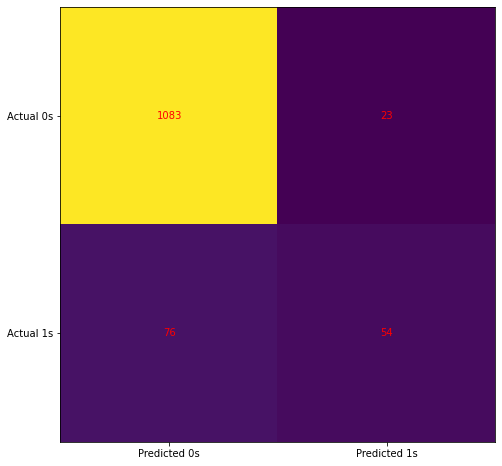

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='red')

plt.show()

#### (b) DECISION TREE ALGORITHM

In [33]:
from sklearn import tree

#Create a Decision Tree Classifier
dt1=tree.DecisionTreeClassifier()
dt2=tree.DecisionTreeClassifier()
dt3=tree.DecisionTreeClassifier()
dt4=tree.DecisionTreeClassifier()

#Train the model using the training sets
dt1.fit(x1_train,y1_train)
dt2.fit(x2_train,y2_train)
dt3.fit(x3_train,y3_train)
dt4.fit(x4_train,y4_train)

DecisionTreeClassifier()

In [34]:
#Predict the target/response for test dataset
pred_test1=dt1.predict(x1_test)
pred_test2=dt2.predict(x2_test)
pred_test3=dt3.predict(x3_test)
pred_test4=dt4.predict(x4_test)

In [35]:
#Evaluate the model
print(accuracy_score(y1_test,pred_test1),
     accuracy_score(y2_test,pred_test2),
     accuracy_score(y3_test,pred_test3),
     accuracy_score(y4_test,pred_test4))

0.8879177793962936 0.8747419640224122 0.8851132686084142 0.8585114222549742


In [36]:
#Matrix dengan nilai accuracy score terbesar
matrix=confusion_matrix(y3_test,pred_test3)
print(matrix)

[[1027   79]
 [  63   67]]


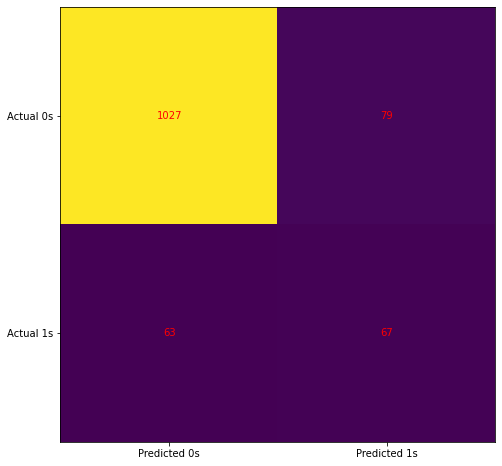

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='red')

plt.show()

#### (c) RANDOM FOREST ALGORITHM

In [38]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
rf1=RandomForestClassifier()
rf2=RandomForestClassifier()
rf3=RandomForestClassifier()
rf4=RandomForestClassifier()

#Train the model using the training set
rf1.fit(x1_train,y1_train)
rf2.fit(x2_train,y2_train)
rf3.fit(x3_train,y3_train)
rf4.fit(x4_train,y4_train)

RandomForestClassifier()

In [39]:
#Predict the target/response for test dataset
pred_test1=rf1.predict(x1_test)
pred_test2=rf2.predict(x2_test)
pred_test3=rf3.predict(x3_test)
pred_test4=rf4.predict(x4_test)

In [40]:
#Evaluate the model
print(accuracy_score(y1_test,pred_test1),
     accuracy_score(y2_test,pred_test2),
     accuracy_score(y3_test,pred_test3),
     accuracy_score(y4_test,pred_test4))

0.9146232904426641 0.906664700678266 0.9134304207119741 0.8843036109064112


In [41]:
#Matrix dengan nilai accuracy score terbesar
matrix=confusion_matrix(y1_test,pred_test1)
print(matrix)

[[10665   282]
 [  773   637]]


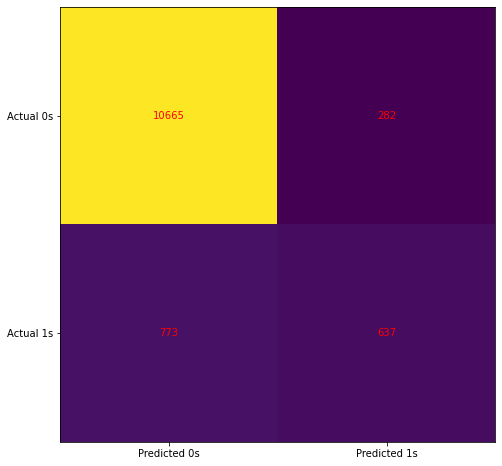

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='red')

plt.show()

In [43]:
#feature importance

feature_imp = pd.Series(rf1.feature_importances_).sort_values(ascending=False) [:6]
feature_imp

1    0.273586
8    0.097196
0    0.078953
9    0.054327
2    0.039315
7    0.025756
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


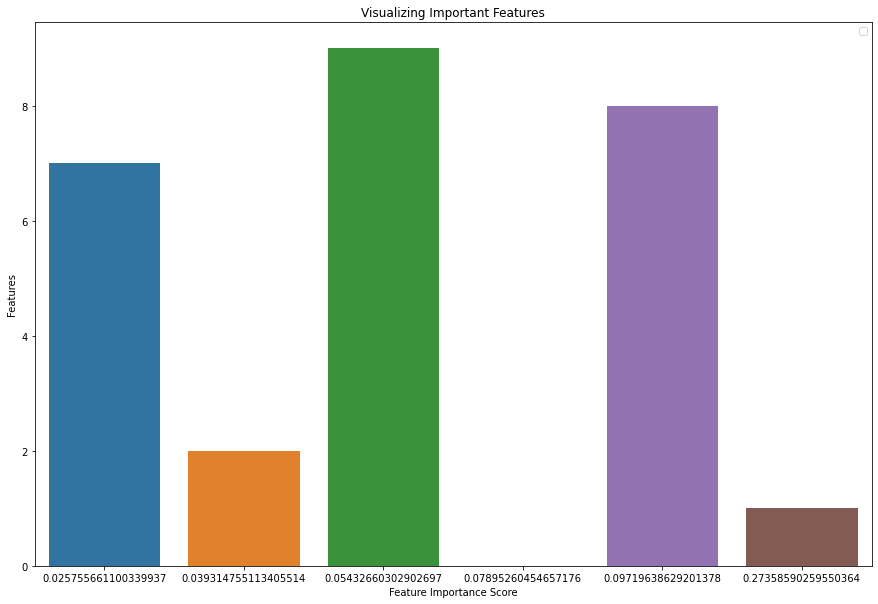

In [44]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15, 10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### (d) SUPPORT VECTOR MACHINE (SVM) ALGORITHM

In [45]:
from sklearn import svm

#Create a svm Classifier
svm_model1=svm.SVC()
svm_model2=svm.SVC()
svm_model3=svm.SVC()
svm_model4=svm.SVC()

#Train the model using the training sets
svm_model1.fit(x1_train,y1_train)
svm_model2.fit(x2_train,y2_train)
svm_model3.fit(x3_train,y3_train)
svm_model4.fit(x4_train,y4_train)

SVC()

In [46]:
#Predict the target/response for test dataset
pred_test1=svm_model1.predict(x1_test)
pred_test2=svm_model2.predict(x2_test)
pred_test3=svm_model3.predict(x3_test)
pred_test4=svm_model4.predict(x4_test)

In [47]:
#Evaluate the model
print(accuracy_score(y1_test,pred_test1),
     accuracy_score(y2_test,pred_test2),
     accuracy_score(y3_test,pred_test3),
     accuracy_score(y4_test,pred_test4))

0.8973051711580481 0.8815246240047184 0.9110032362459547 0.8747236551215918


In [48]:
#Matrix dengan nilai accuracy score terbesar
matrix=confusion_matrix(y3_test,pred_test3)
print(matrix)

[[1093   13]
 [  97   33]]


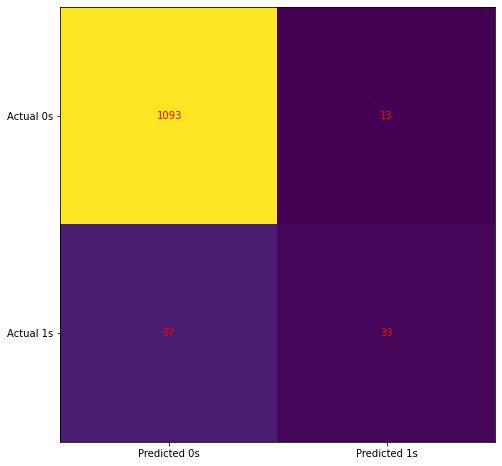

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='red')

plt.show()

#### (e) NAIVE BAYES ALGORITHM

In [50]:
from sklearn.naive_bayes import GaussianNB 

#Create a Naive Bayes model
nb1=GaussianNB()
nb2=GaussianNB()
nb3=GaussianNB()
nb4=GaussianNB()

#Train the model using the training sets
nb1.fit(x1_train,y1_train)
nb2.fit(x2_train,y2_train)
nb3.fit(x3_train,y3_train)
nb4.fit(x4_train,y4_train)

GaussianNB()

In [51]:
#Predict the target/response for test dataset
pred_test1=nb1.predict(x1_test)
pred_test2=nb2.predict(x2_test)
pred_test3=nb3.predict(x3_test)
pred_test4=nb4.predict(x4_test)

In [52]:
#Evaluate the model
print(accuracy_score(y1_test,pred_test1),
     accuracy_score(y2_test,pred_test2),
     accuracy_score(y3_test,pred_test3),
     accuracy_score(y4_test,pred_test4))

0.8648539289471554 0.8585225597168976 0.8616504854368932 0.8415622697126013


In [53]:
#Matrix dengan nilai accuracy score terbesar
matrix=confusion_matrix(y3_test,pred_test3)
print(matrix)

[[987 119]
 [ 52  78]]


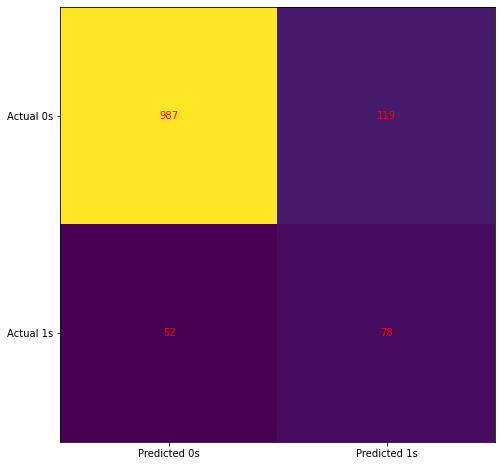

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='red')

plt.show()

#### (f) K-NEAREST NEIGHBOR(kNN) ALGORITHM

In [55]:
from sklearn.neighbors import KNeighborsClassifier

#Create a KNN Classifier
kNN1=KNeighborsClassifier()
kNN2=KNeighborsClassifier()
kNN3=KNeighborsClassifier()
kNN4=KNeighborsClassifier()

#Train the model using the training sets
kNN1.fit(x1_train,y1_train)
kNN2.fit(x2_train,y2_train)
kNN3.fit(x3_train,y3_train)
kNN4.fit(x4_train,y4_train)

KNeighborsClassifier()

In [56]:
#Predict the target/response for test dataset
pred_test1=kNN1.predict(x1_test)
pred_test2=kNN2.predict(x2_test)
pred_test3=kNN3.predict(x3_test)
pred_test4=kNN4.predict(x4_test)

In [57]:
#Evaluate the model
print(accuracy_score(y1_test,pred_test1),
     accuracy_score(y2_test,pred_test2),
     accuracy_score(y3_test,pred_test3),
     accuracy_score(y4_test,pred_test4))

0.907016266084001 0.8818932468298437 0.901294498381877 0.866617538688283


In [58]:
#Matrix dengan nilai accuracy score terbesar
matrix=confusion_matrix(y1_test,pred_test1)
print(matrix)

[[10512   435]
 [  714   696]]


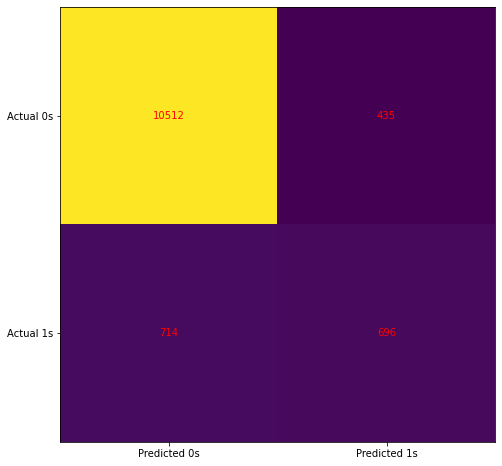

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='red')

plt.show()

### Compare
Model prediksi yang memiliki akurasi terbesar terhadap aktual datasetnya adalah sebagai berikut:
1. Untuk data bank-additional-full.csv : Random Forest Algorithm sebesar 0,911
2. Untuk data bank-full.csv : Random Forest Algorithm sebesar 0,903
3. Untuk data bank-additional.csv : Logistic Regression Algorithm sebesar 0,910
4. Untuk data bank.csv : Random Forest Algorithm sebesar 0,906
Sehingga dapat disimpulkan Random Forest Algorithm adalah algoritma terbaik dalam menyelesaikan permasalahan dalam kasus dataset ini